In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/germany-used-cars-dataset-2023/data.csv


<h2>Initial Import</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [3]:
df=pd.read_csv('/kaggle/input/germany-used-cars-dataset-2023/data.csv',index_col='Unnamed: 0')
df

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


<b>Categorical Columns</b>:<br/>
<li>brand: The brand or manufacturer of the car.</li><br/>
<li>model: The specific model of the car.</li><br/>
<li>color: The color of the car's exterior.</li><br/>
<li>registration_date: The date when the car was registered (Month/Year).</li><br/>
<li>transmission_type: The type of transmission (e.g., automatic, manual).</li><br/>
<li>fuel_type: The type of fuel the car requires.</li><br/>
<li>offer_description: Additional description provided in the car offer.</li><br/>

<b>Numerical Columns:</b><br/>
<li>year: The year in which the car was manufactured.</li><br/>
<li>power_kw: The power of the car in kilowatts (kW).</li><br/>
<li>power_ps: The power of the car in horsepower (ps).</li><br/>
<li>fuel_consumption_l_100km: Information about the car's fuel consumption in L/100km.</li><br/>
<li>fuel_consumption_g_km: Information about the car's fuel consumption in g/km.</li><br/>
<li>mileage_in_km: The total distance traveled by the car in km.</li><br/>
<b> price_in_euro</b>: The price of the car in Euros.This is the Output column</li><br/> 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   registration_date         251075 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  o

In [5]:
df.isnull().sum()

brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

In [6]:
#To show the percentage of null values in each column
null_percentages = df.isnull().sum() / len(df) * 100
print(null_percentages)

brand                        0.000000
model                        0.000000
color                        0.066115
registration_date            0.001593
year                         0.000000
price_in_euro                0.000000
power_kw                     0.053370
power_ps                     0.051378
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    10.703006
fuel_consumption_g_km        0.000000
mileage_in_km                0.060539
offer_description            0.000398
dtype: float64


<p>It can be seen that highest number of null values can be seen in fuel_consumption_l_100km coulumn i.e 10.7 %</p>
<li>Columns brand, model, year, transmission_type, fuel_type, fuel_consumption_g_km, and offer_description: These columns have no missing values (0% null), so no action is required.</li>
<li>color, registration_date, power_kw, power_ps, and mileage_in_km: These columns have very low percentages of missing values.Best option is to drop the rows with missing values since the percentage is negligible (less than 0.1%)</li>
<li>price_in_euro: This column also has no missing values (0% null), so no action is required.</li>
<li>fuel_consumption_l_100km: This column has a relatively higher percentage of missing values (10.7%). You can consider using mean or median imputation to fill in the missing values. Another approach could be to explore if there are any patterns or correlations between this column </li>

In [7]:
#dropping less null containing columns

df_dropped=df.dropna(subset=['color','registration_date','year','power_kw','power_ps','mileage_in_km'])


In [8]:
df_dropped['fuel_consumption_l_100km']

0         10,9 l/100 km
1                   NaN
2                   NaN
3          9,5 l/100 km
4          7,2 l/100 km
              ...      
251074              NaN
251075     7,6 l/100 km
251076     4,7 l/100 km
251077              NaN
251078              NaN
Name: fuel_consumption_l_100km, Length: 250629, dtype: object

In [9]:
substring = "l/100 km"
matches = df_dropped['fuel_consumption_l_100km'].str.contains(substring,na=True)
matches.value_counts()


True     249474
False      1155
Name: fuel_consumption_l_100km, dtype: int64

This shows that 1155 contains units other than l/100 km i.e other units are dropped for example:::
<li>km (Ort)</li>
<li>g/km</li>
<li>kWh/100 km</li>


In [10]:
filtered_df = df_dropped[matches==True]

In [11]:
warnings.filterwarnings("ignore")
filtered_df.loc[:, 'fuel_consumption_l_100km'] = filtered_df['fuel_consumption_l_100km'].str.replace('l/100 km', '').str.replace(",", '.')
filtered_df.loc[:, 'fuel_consumption_l_100km'] = filtered_df['fuel_consumption_l_100km'].replace('- ()', np.nan)
filtered_df.loc[:, 'fuel_consumption_l_100km'] = filtered_df['fuel_consumption_l_100km'].str.replace('l/100 km', '').astype(float)
mean_val=filtered_df['fuel_consumption_l_100km'].dropna().mean()
filtered_df.loc[:, 'fuel_consumption_l_100km'] =filtered_df['fuel_consumption_l_100km'].fillna(mean_val)
filtered_df.loc[:, 'power_kw'] = filtered_df['power_kw'].astype(float)
filtered_df.loc[:, 'power_ps']=filtered_df['power_ps'].astype(float)
filtered_df.loc[:, 'year']=filtered_df['year'].astype(int)
filtered_df.loc[:, 'price_in_euro']=filtered_df['price_in_euro'].astype(float)
substring = "g/km"
matches = filtered_df['fuel_consumption_g_km'].str.contains(substring,na=True)

<h2>ANALYSISIS</h2>

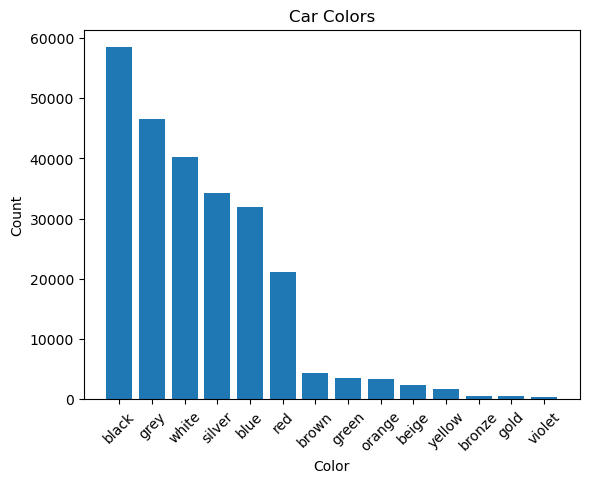

In [12]:
# Generate a bar chart of the car colors
color_counts = filtered_df['color'].value_counts()
plt.bar(color_counts.index, color_counts.values)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Car Colors')
plt.xticks(rotation=45)
plt.show()


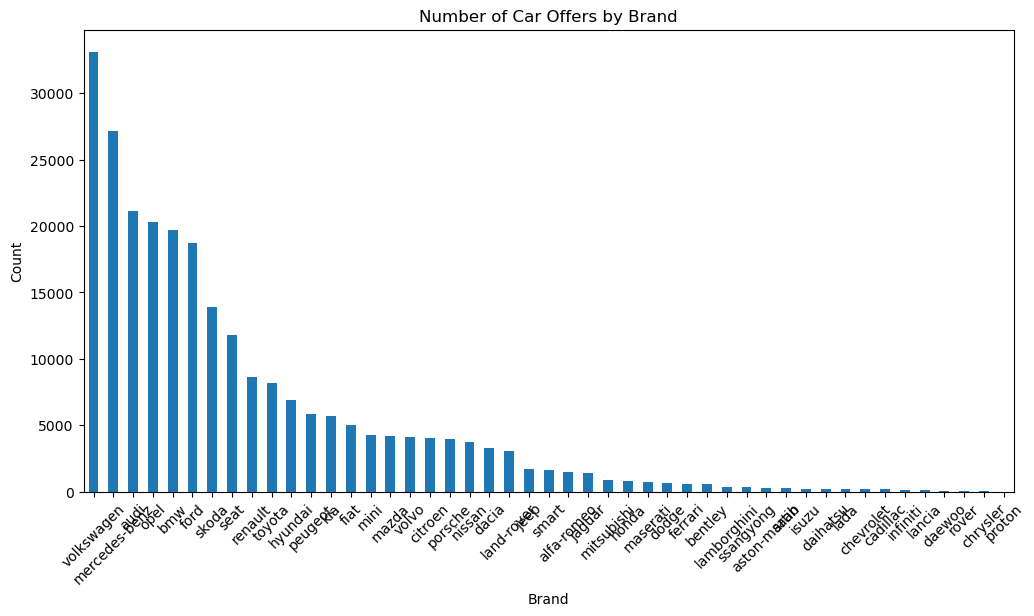

In [13]:

brand_counts = filtered_df['brand'].value_counts()
plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar')
plt.title('Number of Car Offers by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<Figure size 800x600 with 0 Axes>

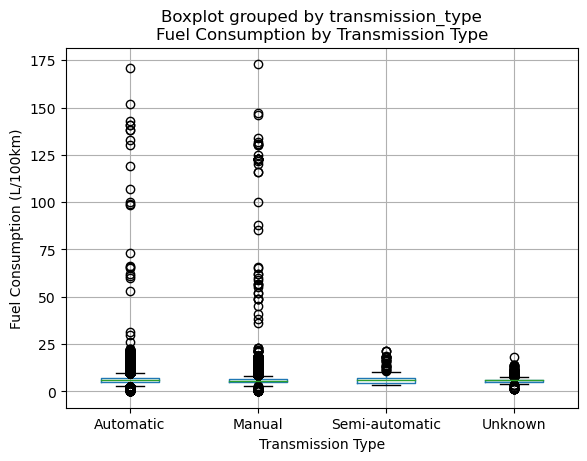

In [14]:
plt.figure(figsize=(8, 6))
filtered_df.boxplot(column='fuel_consumption_l_100km', by='transmission_type')
plt.title('Fuel Consumption by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Fuel Consumption (L/100km)')
plt.show()


<Figure size 1200x1000 with 0 Axes>

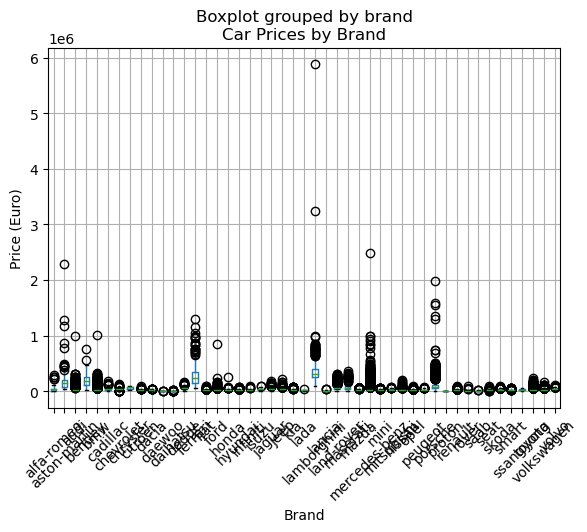

In [15]:
plt.figure(figsize=(12, 10))
filtered_df.boxplot(column='price_in_euro', by='brand')
plt.title('Car Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (Euro)')
plt.xticks(rotation=45)
plt.show()


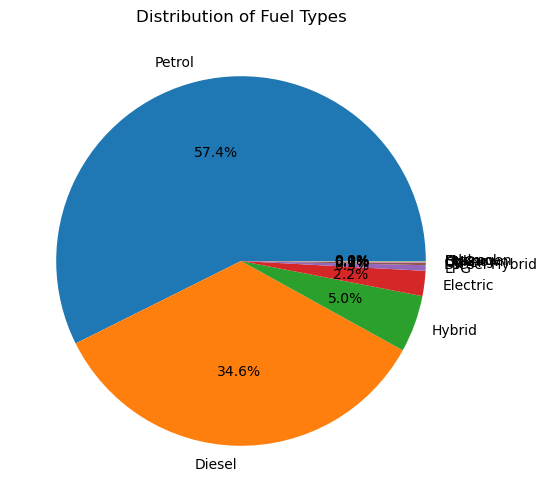

In [16]:
fuel_type_counts = filtered_df['fuel_type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Fuel Types')
plt.show()


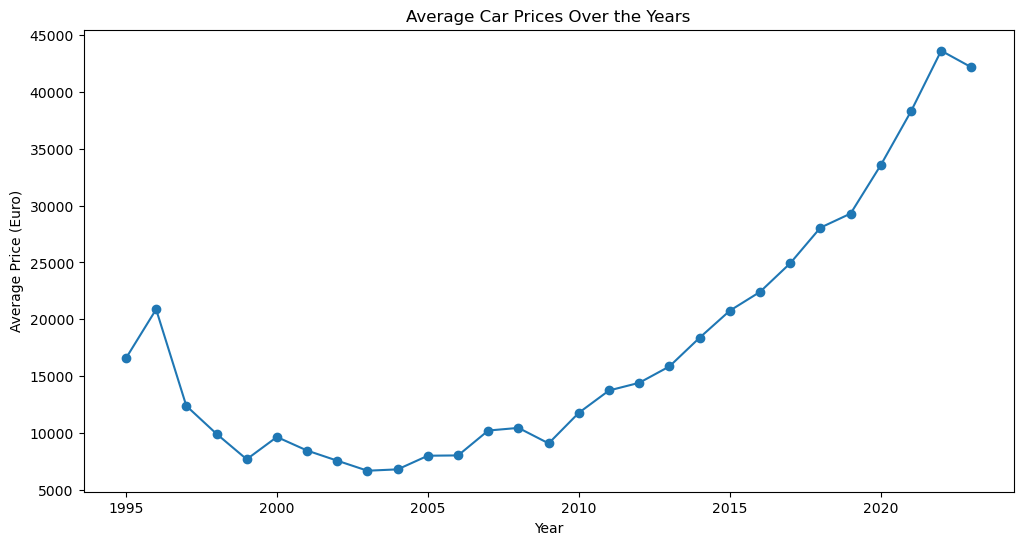

In [17]:
yearly_avg_prices = filtered_df.groupby('year')['price_in_euro'].mean()
plt.figure(figsize=(12, 6))
yearly_avg_prices.plot(marker='o')
plt.title('Average Car Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price (Euro)')
plt.show()


<h2>THANK YOU AND WAITING FOR YOUR FEEDBACK</h2>